# Exploratory Data Analysis

___

### Table Of Contents

1. 
2. 
3. 
4. 
5. 
6. 
7. 
8. 
9. 
10. 

___

### 1. Import Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random
from collections import Counter

___

### 2. Expand maximum range of rows

Lots of incoming data from the Spoonacular API.<br>
It is probably a good idea to expand the max range of rows/columns/width to view in Pandas.<br>
Use <b>pd.set_option()</b>

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

___

### 3. Import data

#### Let's edit the DataFrame to sort by "Likes" in descending order for each recipe

In [21]:
#read in .csv file
df = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/recipe-strategy/Data/top_1000_recipes_info.csv', index_col=0)

#make all column names lowercase for ease and consistency
df.columns = map(str.lower, df.columns)

#let's sort the data by "aggregatelikes" so we can see most "liked" recipes at the top.
df = df.sort_values(by=['aggregatelikes'], ascending=False)

#reset index
df = df.reset_index(drop=True)

#preview dataframe
df.head()

,ids,titles,aggregatelikes,spoonacularscore,healthscore,priceperserving,readyinminutes,servings,weightwatchersmartpoints,veryhealthy,vegetarian,vegan,glutenfree,dairyfree,whole30,calories,fat,saturated_fat,carbs,sugar,cholesterol,sodium,protein
0,702811,Garlic Parmesan Roasted Broccoli,1053360,100.0,61.0,49.95,15,6,2,True,False,False,True,False,False,120.85,8.52,1.70,8.67,2.11,2.83,298.49,4.83
1,773578,Pesto Salmon and Italian Veggies in Foil,757517,100.0,100.0,618.59,45,4,7,True,False,False,True,True,True,395.76,20.27,3.20,16.03,8.34,94.75,423.42,38.12
2,860943,Garlic Parmesan Broccoli and Potatoes in Foil,695887,100.0,95.0,165.55,25,4,6,True,False,False,True,False,False,269.85,12.93,2.60,33.04,3.92,4.25,310.43,9.64
3,622596,Whole30 grilled salmon with avocado salsa,462647,100.0,100.0,576.41,10,4,10,True,False,False,True,True,True,450.17,25.51,3.82,8.29,1.30,124.74,303.93,46.54
4,667231,Baked Salmon with Garlic and Dijon,429230,100.0,87.0,392.99,25,4,4,True,False,False,True,True,True,245.64,10.90,1.68,0.90,0.27,93.55,387.98,33.93


___

### 4. Get Quick Metrics Of Data

In [67]:
#lets see the types of information we have in the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
ids                         1000 non-null int64
titles                      1000 non-null object
aggregatelikes              1000 non-null int64
spoonacularscore            1000 non-null float64
healthscore                 1000 non-null float64
priceperserving             1000 non-null float64
readyinminutes              1000 non-null int64
servings                    1000 non-null int64
weightwatchersmartpoints    1000 non-null int64
veryhealthy                 1000 non-null bool
vegetarian                  1000 non-null bool
vegan                       1000 non-null bool
glutenfree                  1000 non-null bool
dairyfree                   1000 non-null bool
whole30                     1000 non-null bool
calories                    1000 non-null float64
fat                         1000 non-null float64
saturated_fat               1000 non-null float64
carbs                  

In [66]:
#let's see the overall metrics of the information in the dataframe:
df.describe()

,ids,aggregatelikes,spoonacularscore,healthscore,priceperserving,readyinminutes,servings,weightwatchersmartpoints,calories,fat,saturated_fat,carbs,sugar,cholesterol,sodium,protein
count,1.000000e+03,1.000000e+03,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.957219e+05,1.326577e+04,100.0,91.509000,223.910970,35.596000,3.939000,7.684000,338.380930,14.385450,2.664490,40.029320,9.905590,17.717840,423.872570,15.803870
std,1.753658e+05,6.138746e+04,0.0,12.010669,149.494085,53.708728,2.501107,5.526906,177.759375,12.505991,3.215749,22.239141,8.519329,43.611803,424.320054,12.738399
min,7.835000e+03,3.600000e+01,100.0,48.000000,29.130000,1.000000,1.000000,0.000000,18.330000,0.460000,0.050000,0.900000,0.020000,0.000000,5.150000,0.200000
25%,5.091368e+05,5.220000e+02,100.0,85.000000,118.975000,12.000000,2.000000,3.000000,200.957500,5.657500,0.985000,20.875000,4.132500,0.000000,192.537500,6.360000
50%,5.841750e+05,1.306000e+03,100.0,100.000000,177.905000,30.000000,4.000000,7.000000,319.810000,11.335000,1.870000,37.490000,7.405000,0.000000,311.905000,12.350000
75%,7.152728e+05,4.163250e+03,100.0,100.000000,284.217500,45.000000,4.000000,11.000000,440.610000,18.820000,3.352500,58.197500,13.010000,13.050000,540.110000,20.972500
max,1.046984e+06,1.053360e+06,100.0,100.000000,988.370000,600.000000,32.000000,38.000000,1035.660000,76.730000,45.760000,91.730000,51.720000,782.450000,7054.600000,75.060000


In [65]:
#lets see the breakdown of how recipes fall into different diet "buckets"

display(df['veryhealthy'].value_counts())
display(df['vegetarian'].value_counts())
display(df['vegan'].value_counts())
display(df['glutenfree'].value_counts())
display(df['dairyfree'].value_counts())
display(df['whole30'].value_counts())

True     996
False      4
Name: veryhealthy, dtype: int64

True     628
False    372
Name: vegetarian, dtype: int64

False    523
True     477
Name: vegan, dtype: int64

True     829
False    171
Name: glutenfree, dtype: int64

True     763
False    237
Name: dairyfree, dtype: int64

False    761
True     239
Name: whole30, dtype: int64

___

### 5. Plot Predictors Versus Target (Likes) To Get A Sense Of The Data 

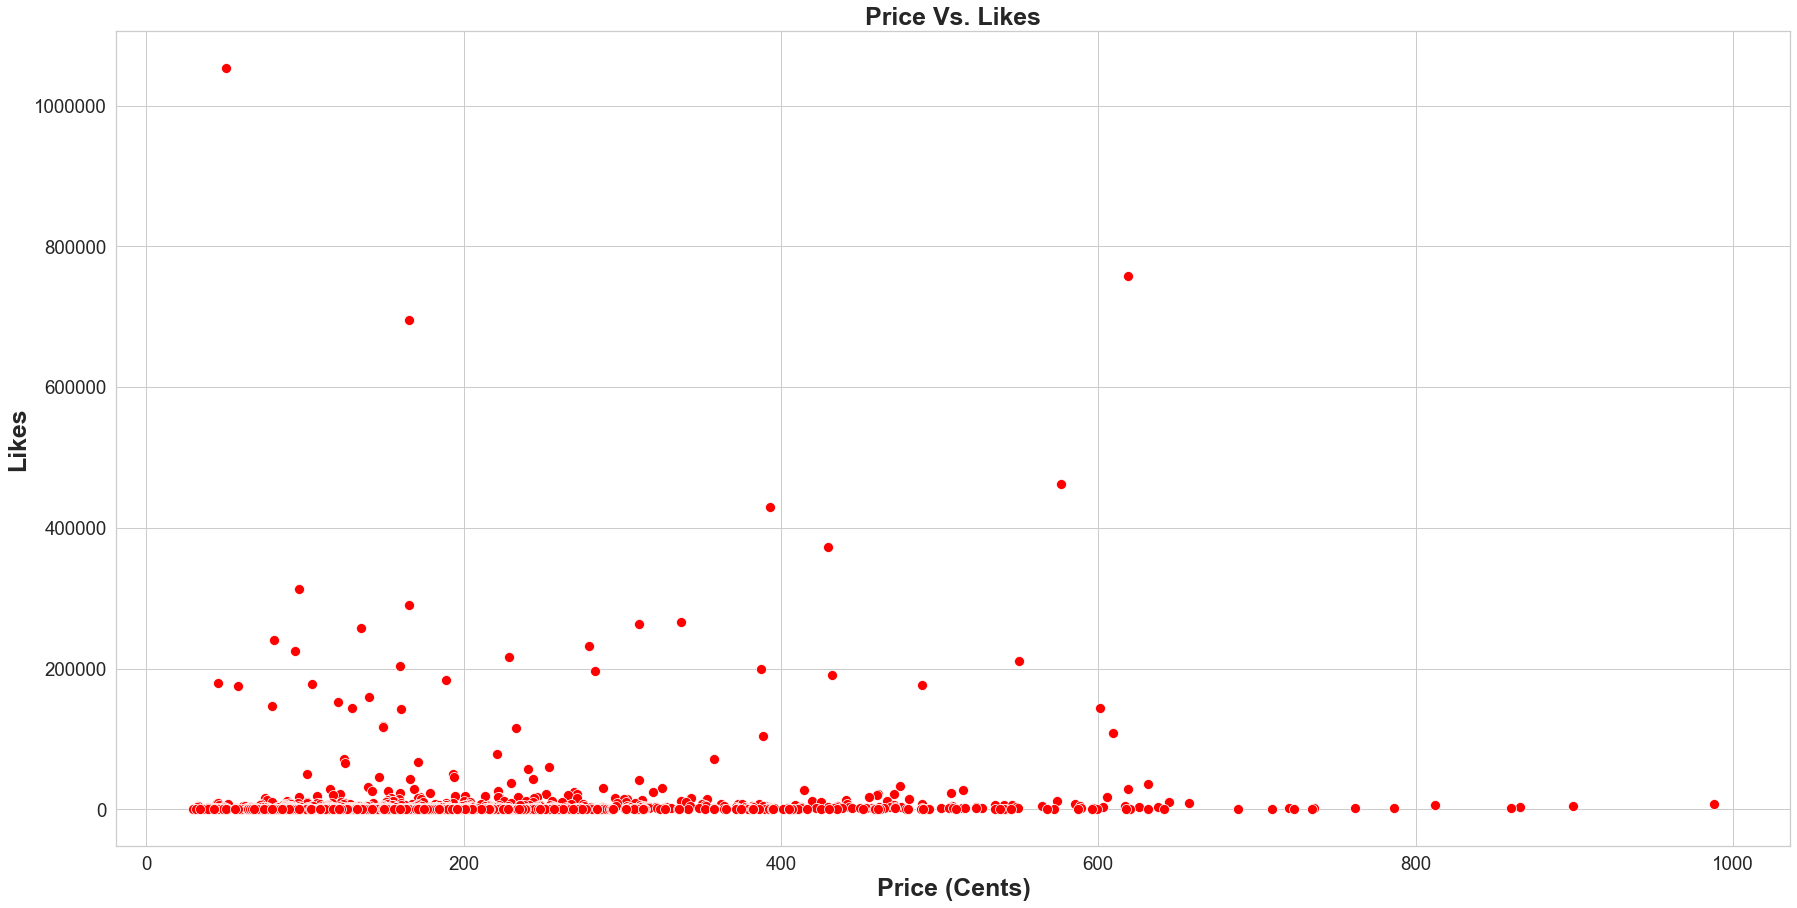

In [35]:
#scatterplot of "priceperserving" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="priceperserving", y="aggregatelikes", color='red', s=100, data=df)
plt.xlabel('Price (Cents)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Price Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('price_versus_likes.pdf', dpi=300)

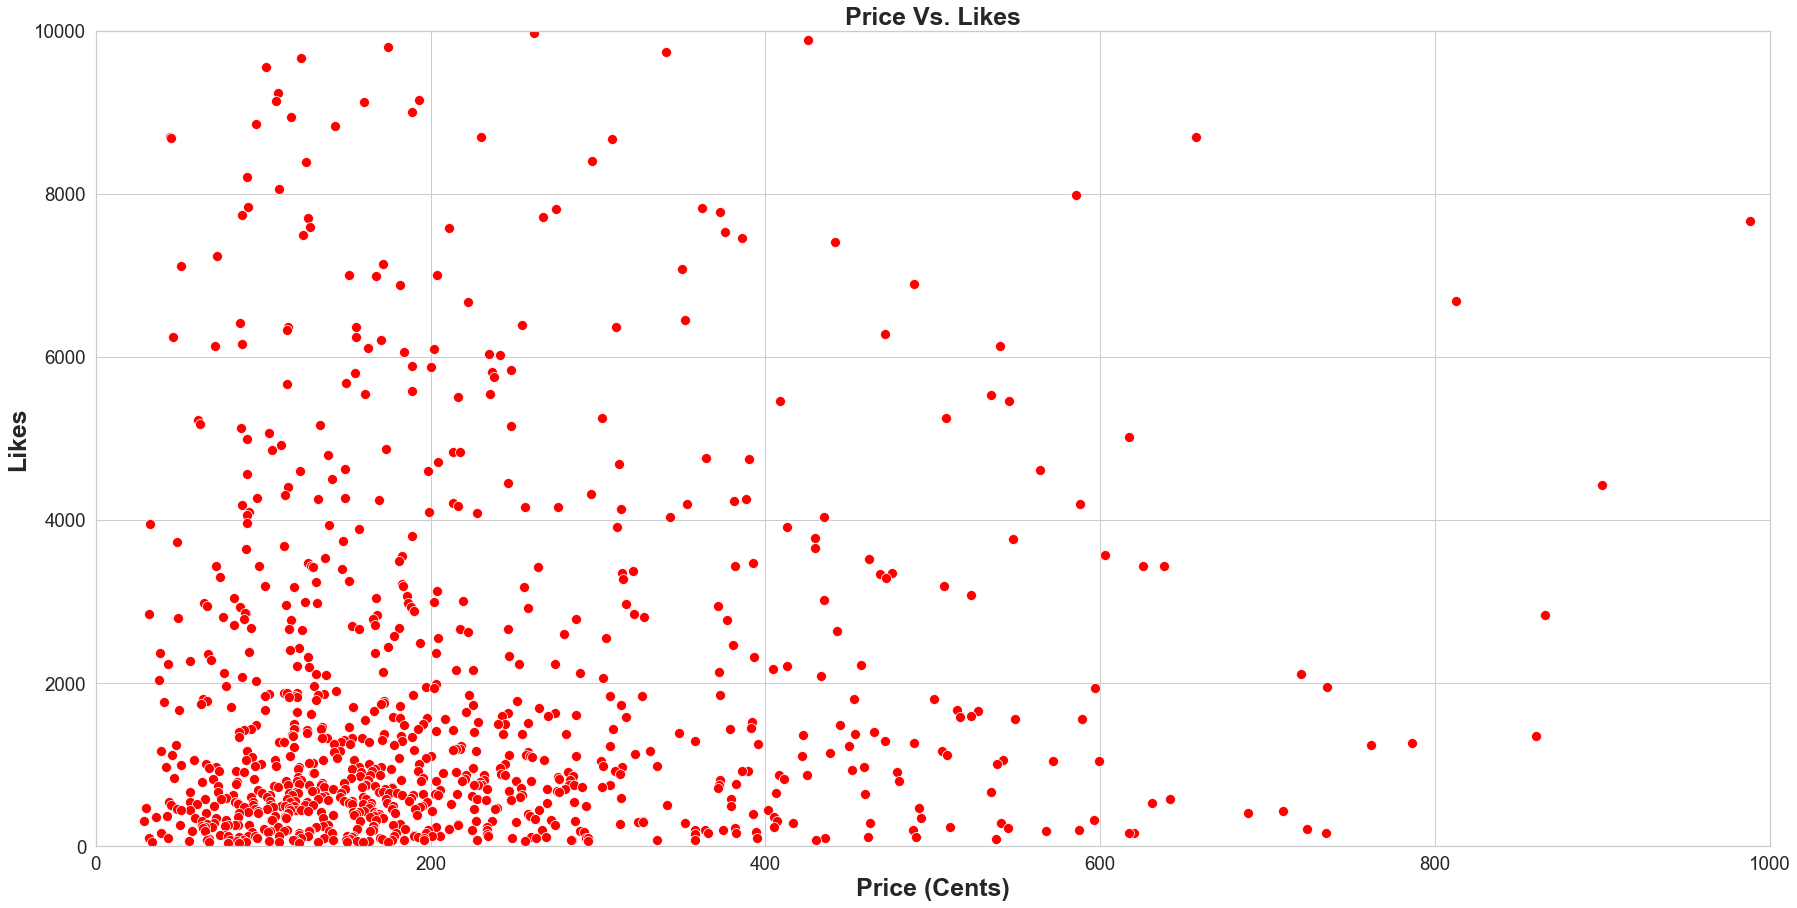

In [40]:
#scatterplot of "priceperserving" vs "aggregatelikes" when "Likes" (y-axis) is less than 10,000 per recipe

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="priceperserving", y="aggregatelikes", color='red', s=100, data=df)
plt.xlabel('Price (Cents)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Price Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Price Vs. Likes looks very different when "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,1000,0,10000])
plt.show()

# plt.savefig('price_versus_likes_10000.pdf', dpi=300)

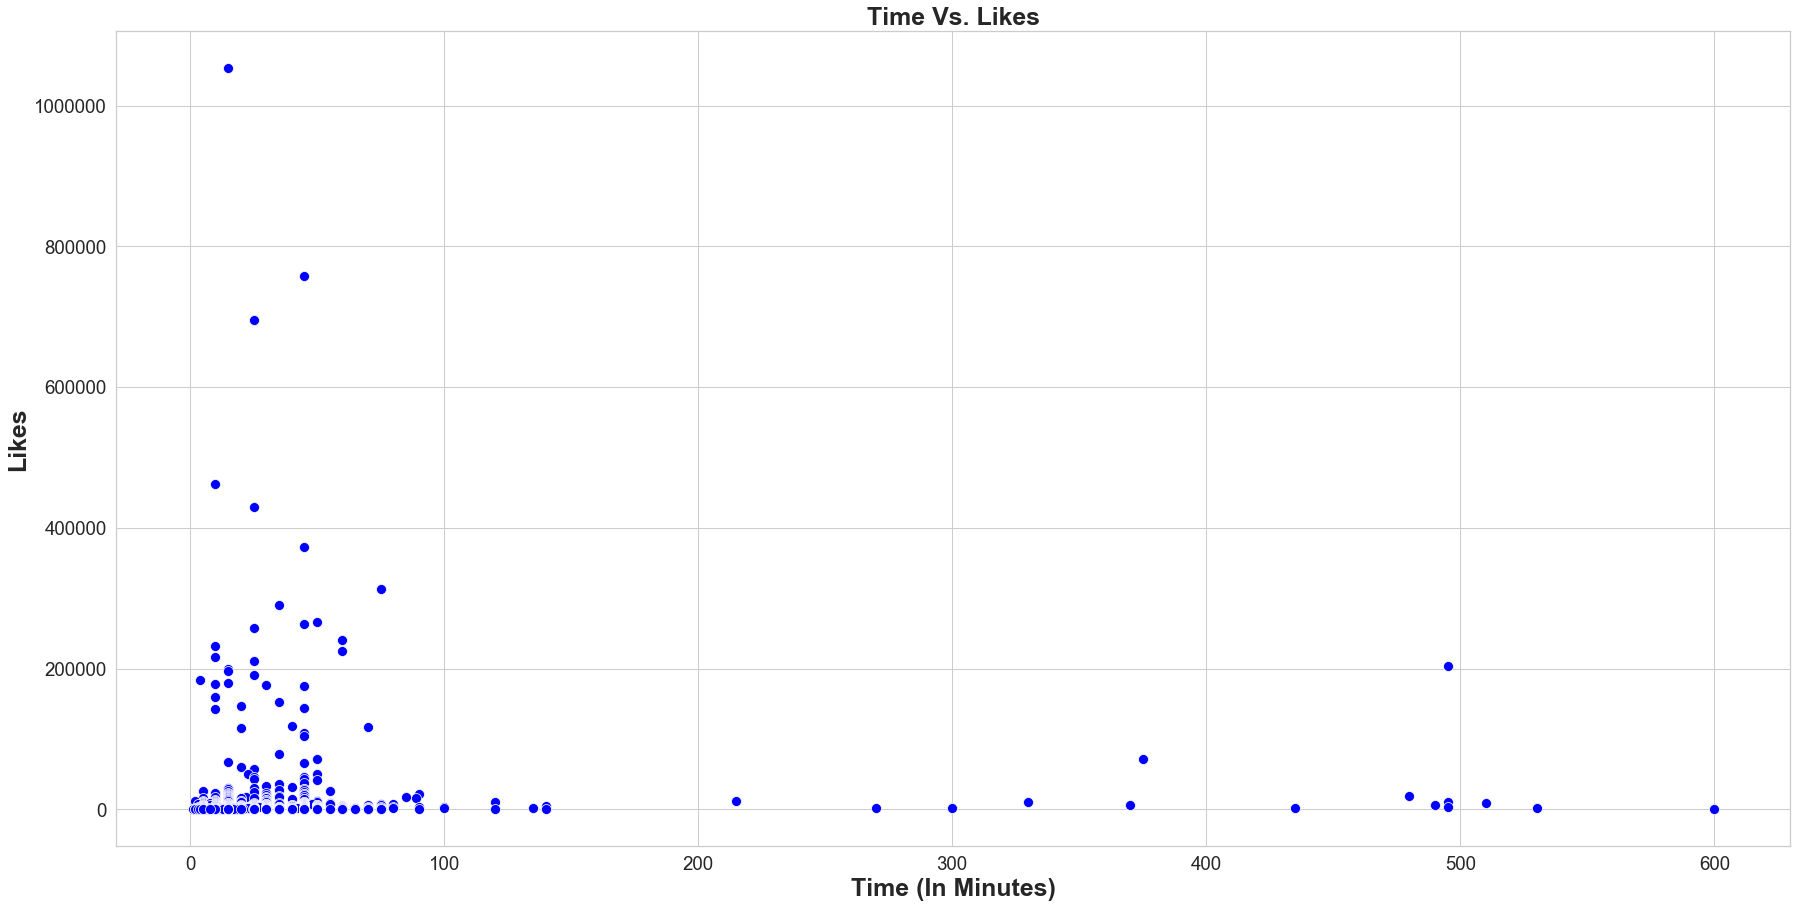

In [45]:
#scatterplot of "readyinminutes" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="readyinminutes", y="aggregatelikes", color='blue', s=100, data=df)
plt.xlabel('Time (In Minutes)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Time Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('time_versus_likes.pdf', dpi=300)

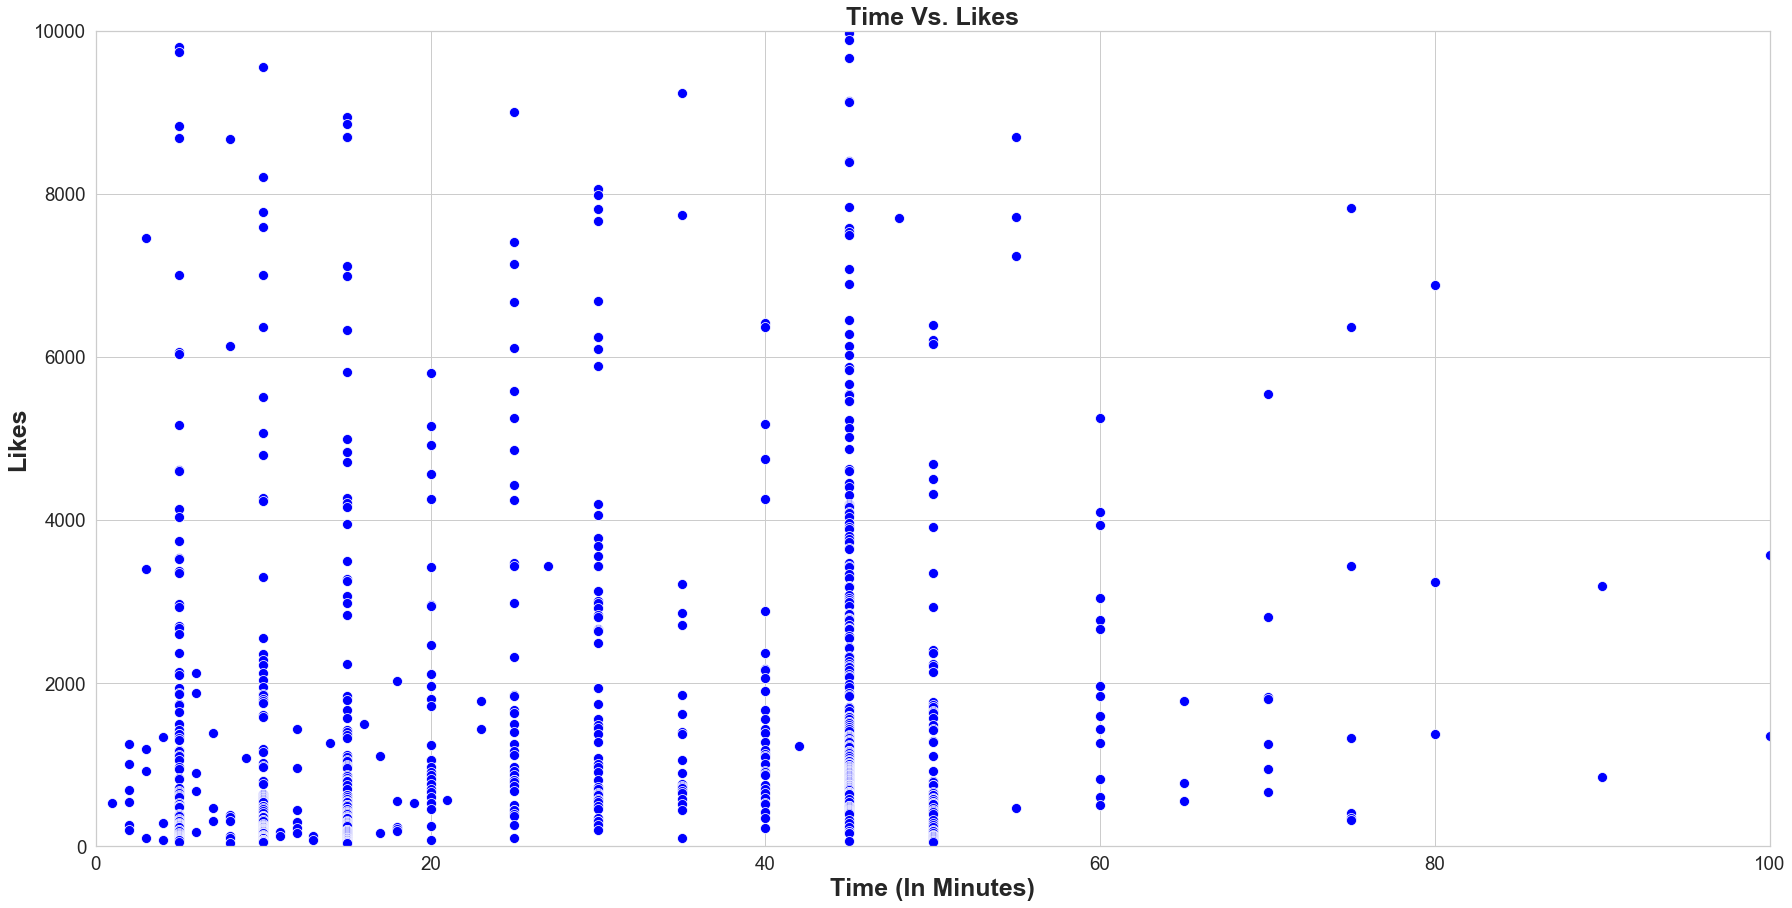

In [46]:
#scatterplot of "readyinminutes" vs "aggregatelikes" with x less than 100, and y less than 10,000

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="readyinminutes", y="aggregatelikes", color='blue', s=100, data=df)
plt.xlabel('Time (In Minutes)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Time Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Time Vs. Likes looks very different when "Time" (x-axis)is less than 100 minutes
#and "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,100,0,10000])
plt.show()

# plt.savefig('time_versus_likes_10000.pdf', dpi=300)

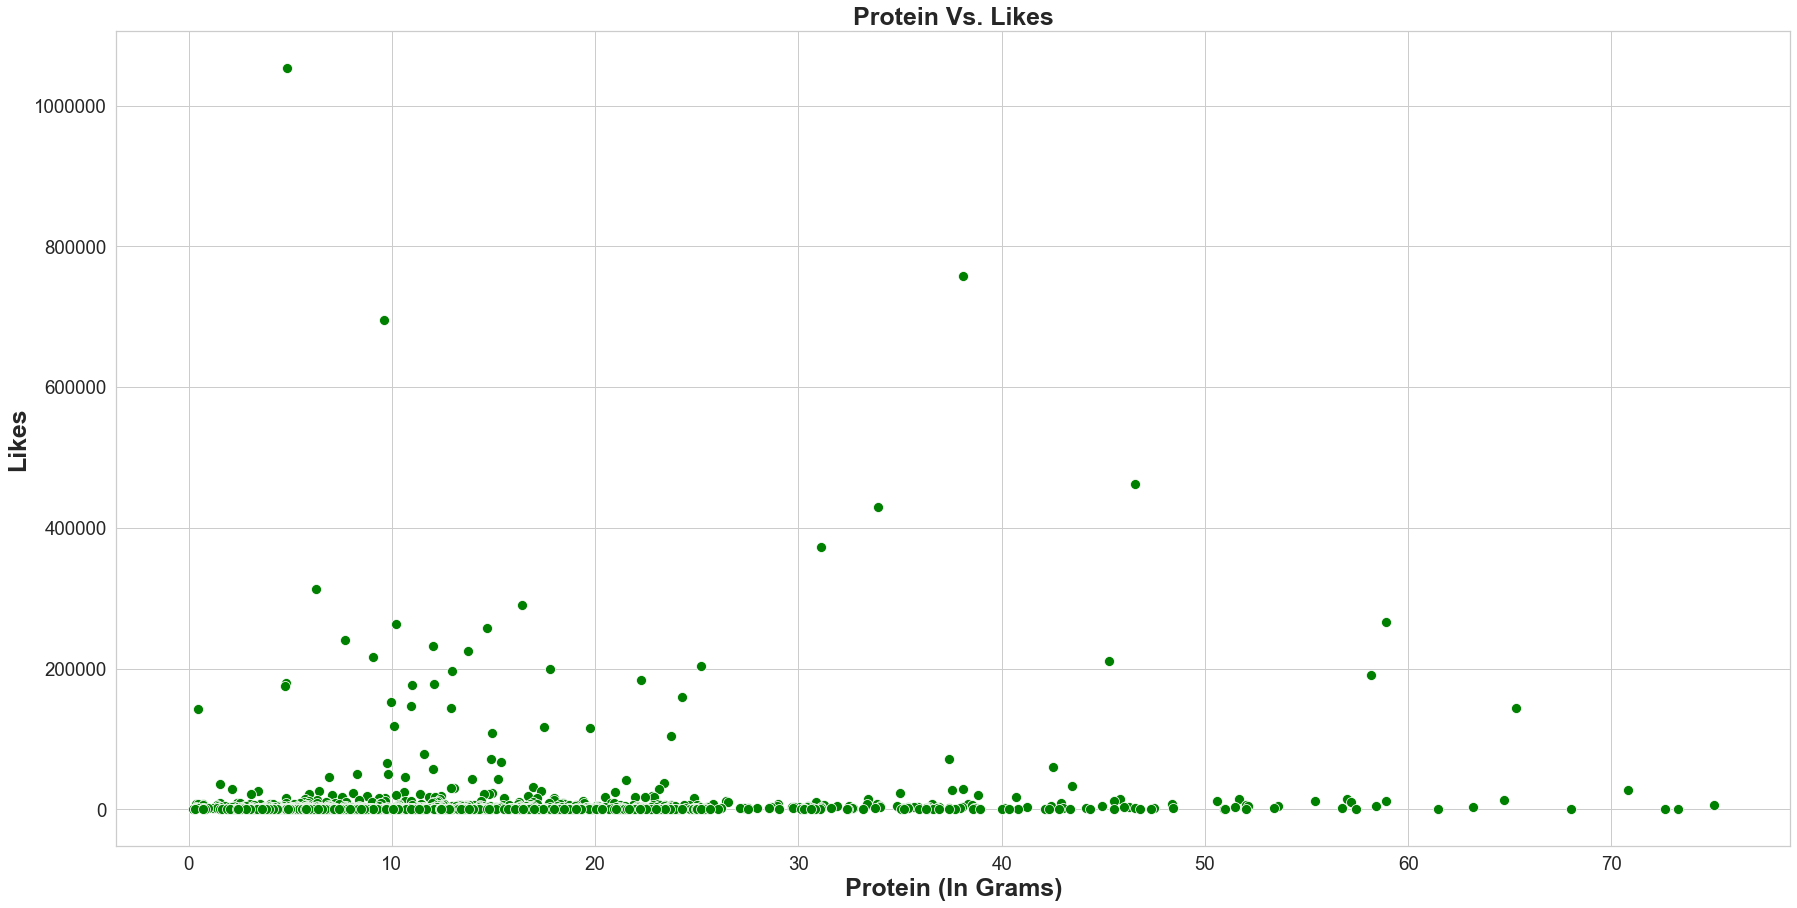

In [48]:
#scatterplot of "protein" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="protein", y="aggregatelikes", color='green', s=100, data=df)
plt.xlabel('Protein (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Protein Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('protein_versus_likes.pdf', dpi=300)

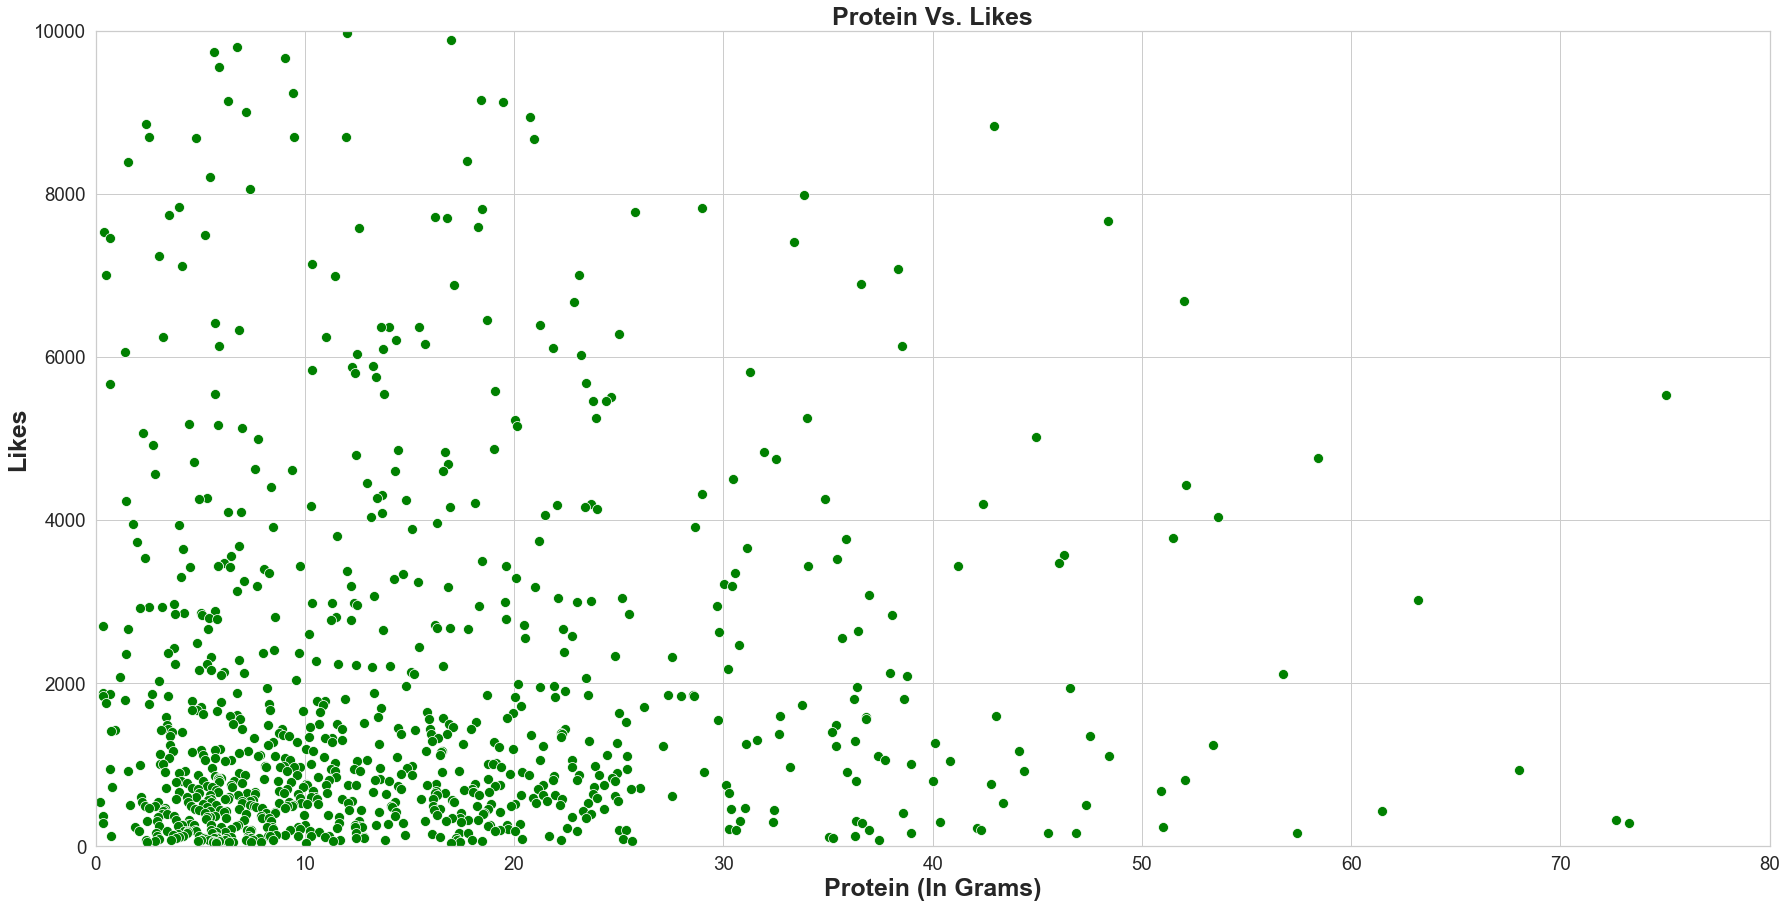

In [49]:
#scatterplot of "protein" vs "aggregatelikes" with y less than 10,000

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="protein", y="aggregatelikes", color='green', s=100, data=df)
plt.xlabel('Protein (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Protein Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Protein Vs. Likes looks very different when "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,80,0,10000])
plt.show()

# plt.savefig('protein_versus_likes_10000.pdf', dpi=300)

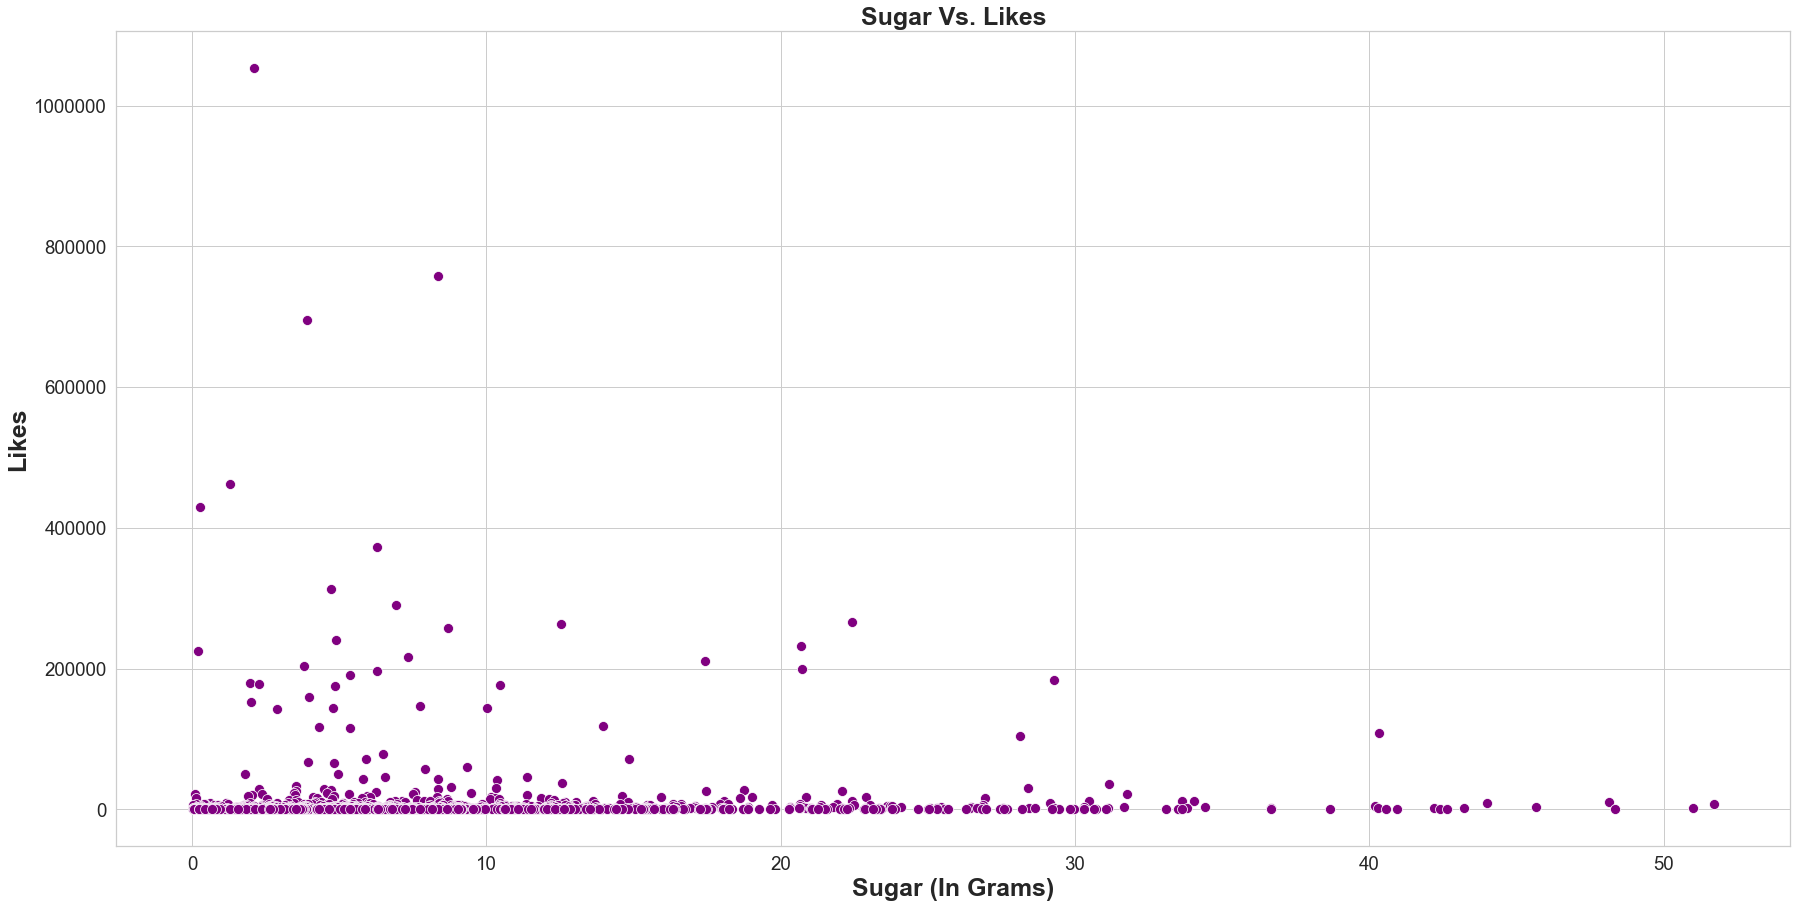

In [69]:
#scatterplot of "sugar" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="sugar", y="aggregatelikes", color='purple', s=100, data=df)
plt.xlabel('Sugar (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Sugar Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('sugar_versus_likes.pdf', dpi=300)

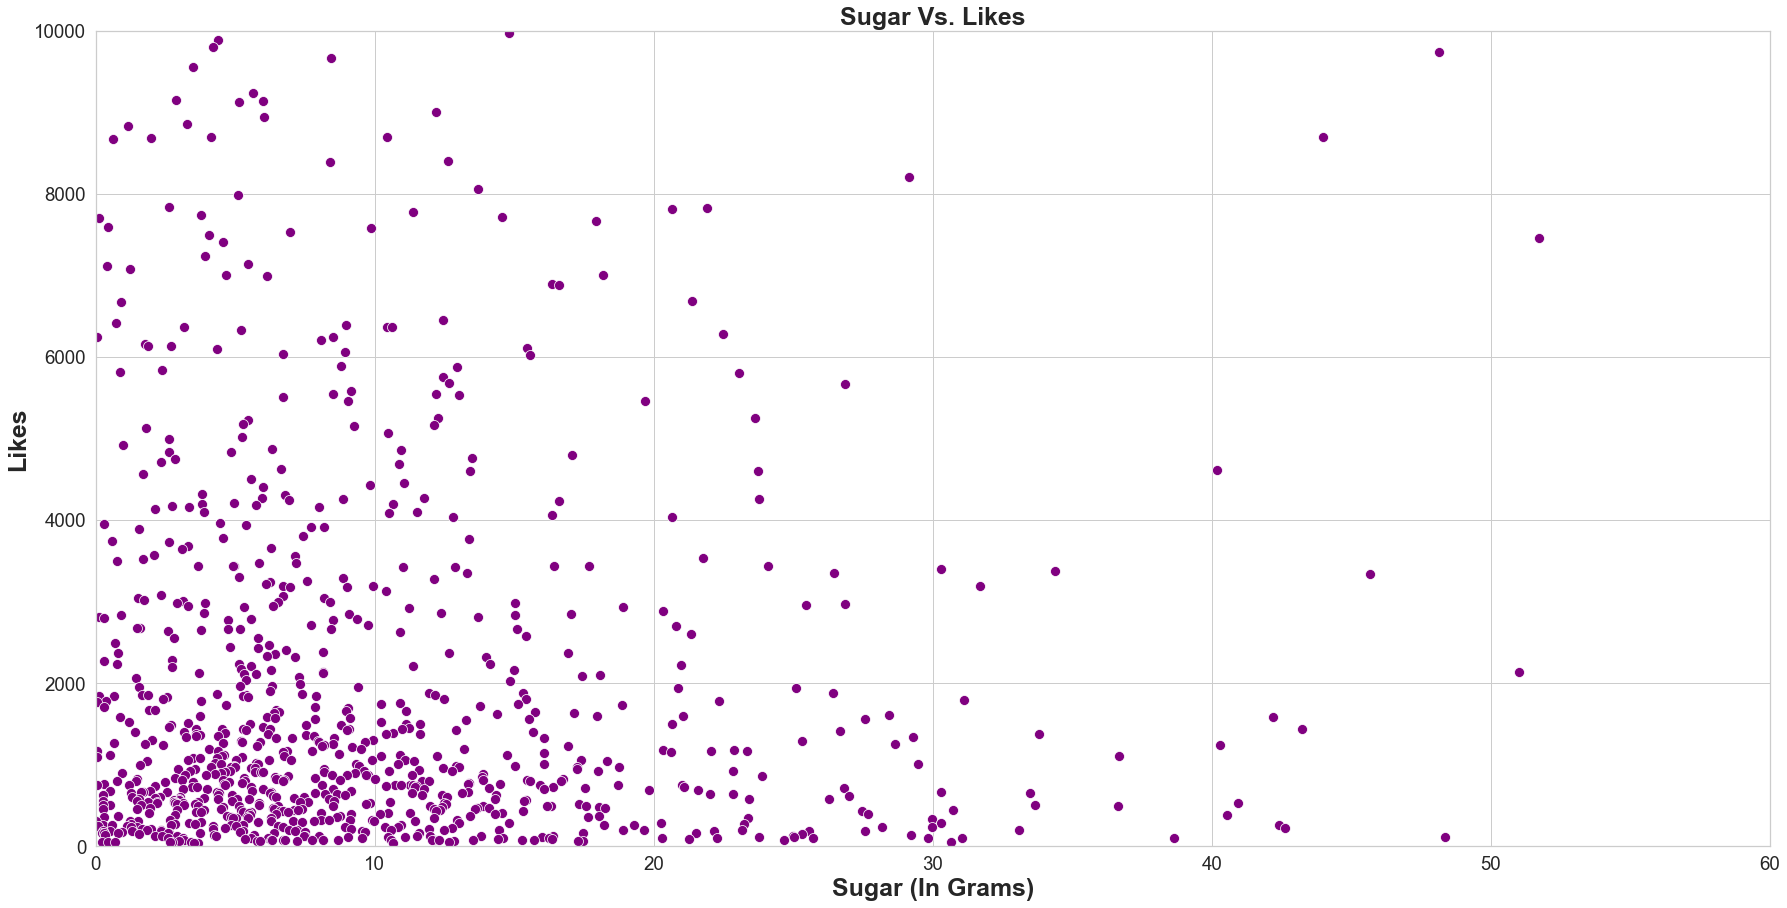

In [73]:
#scatterplot of "sugar" vs "aggregatelikes" with y less than 10,000

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="sugar", y="aggregatelikes", color='purple', s=100, data=df)
plt.xlabel('Sugar (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Sugar Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Sugar Vs. Likes looks very different when "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,60,0,10000])
plt.show()

# plt.savefig('sugar_versus_likes_10000.pdf', dpi=300)

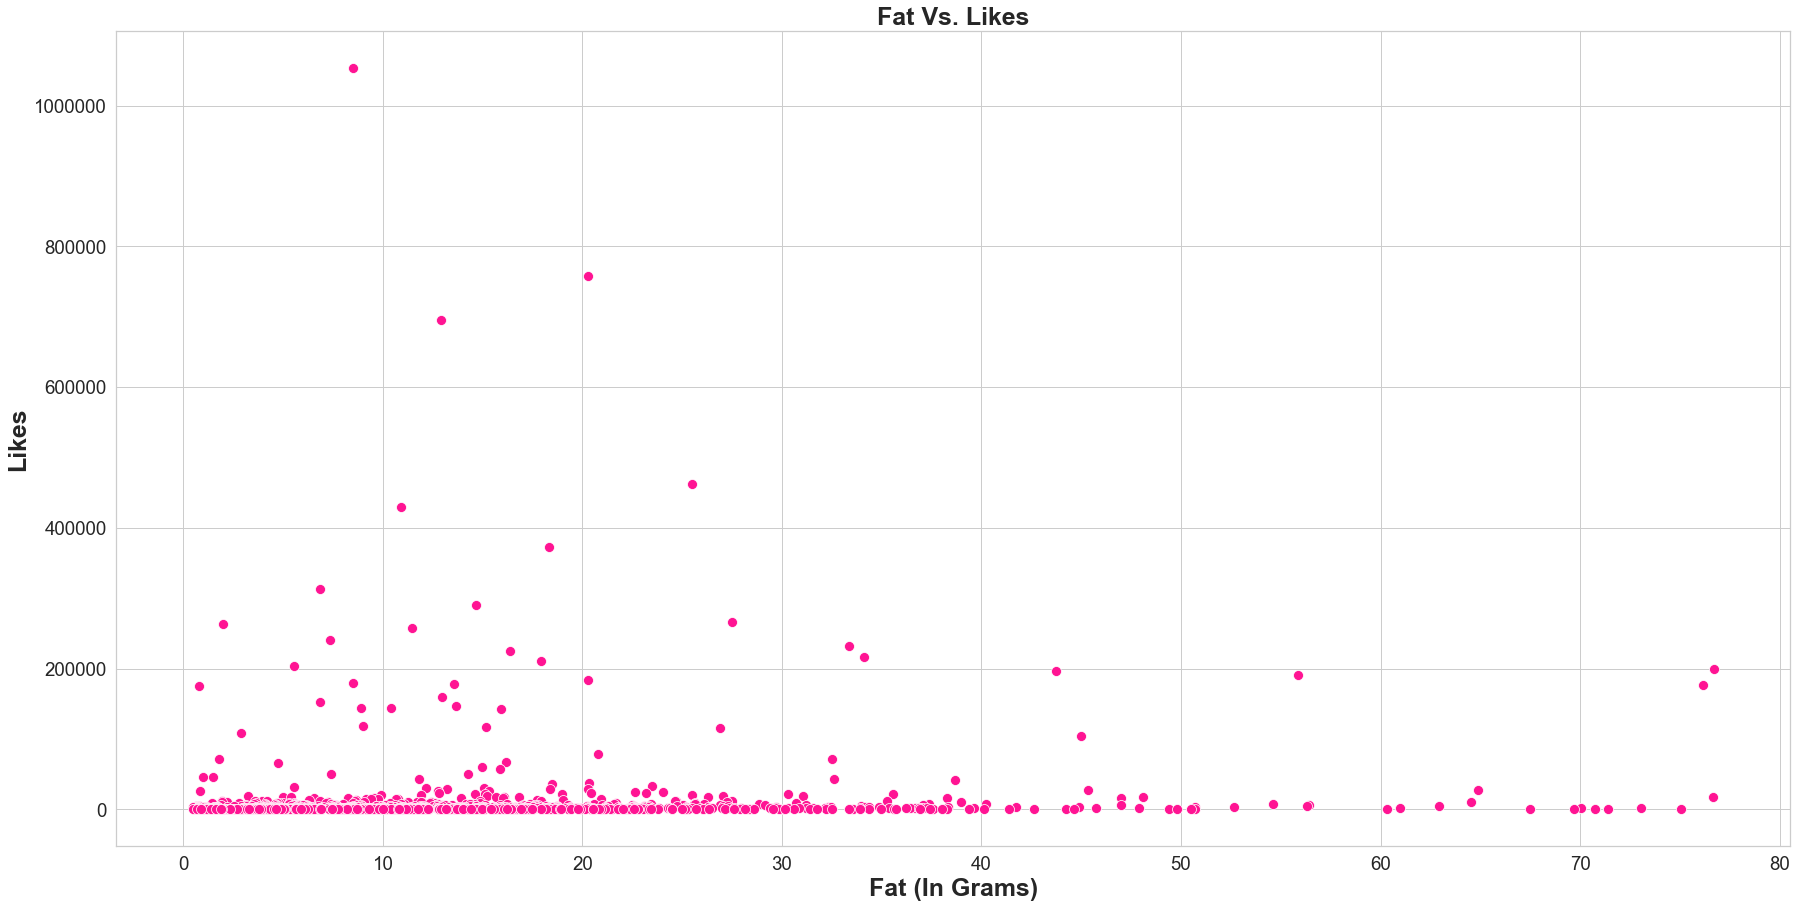

In [76]:
#scatterplot of "fat" vs "aggregatelikes"

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="fat", y="aggregatelikes", color='deeppink', s=100, data=df)
plt.xlabel('Fat (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Fat Vs. Likes', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('fat_versus_likes.pdf', dpi=300)

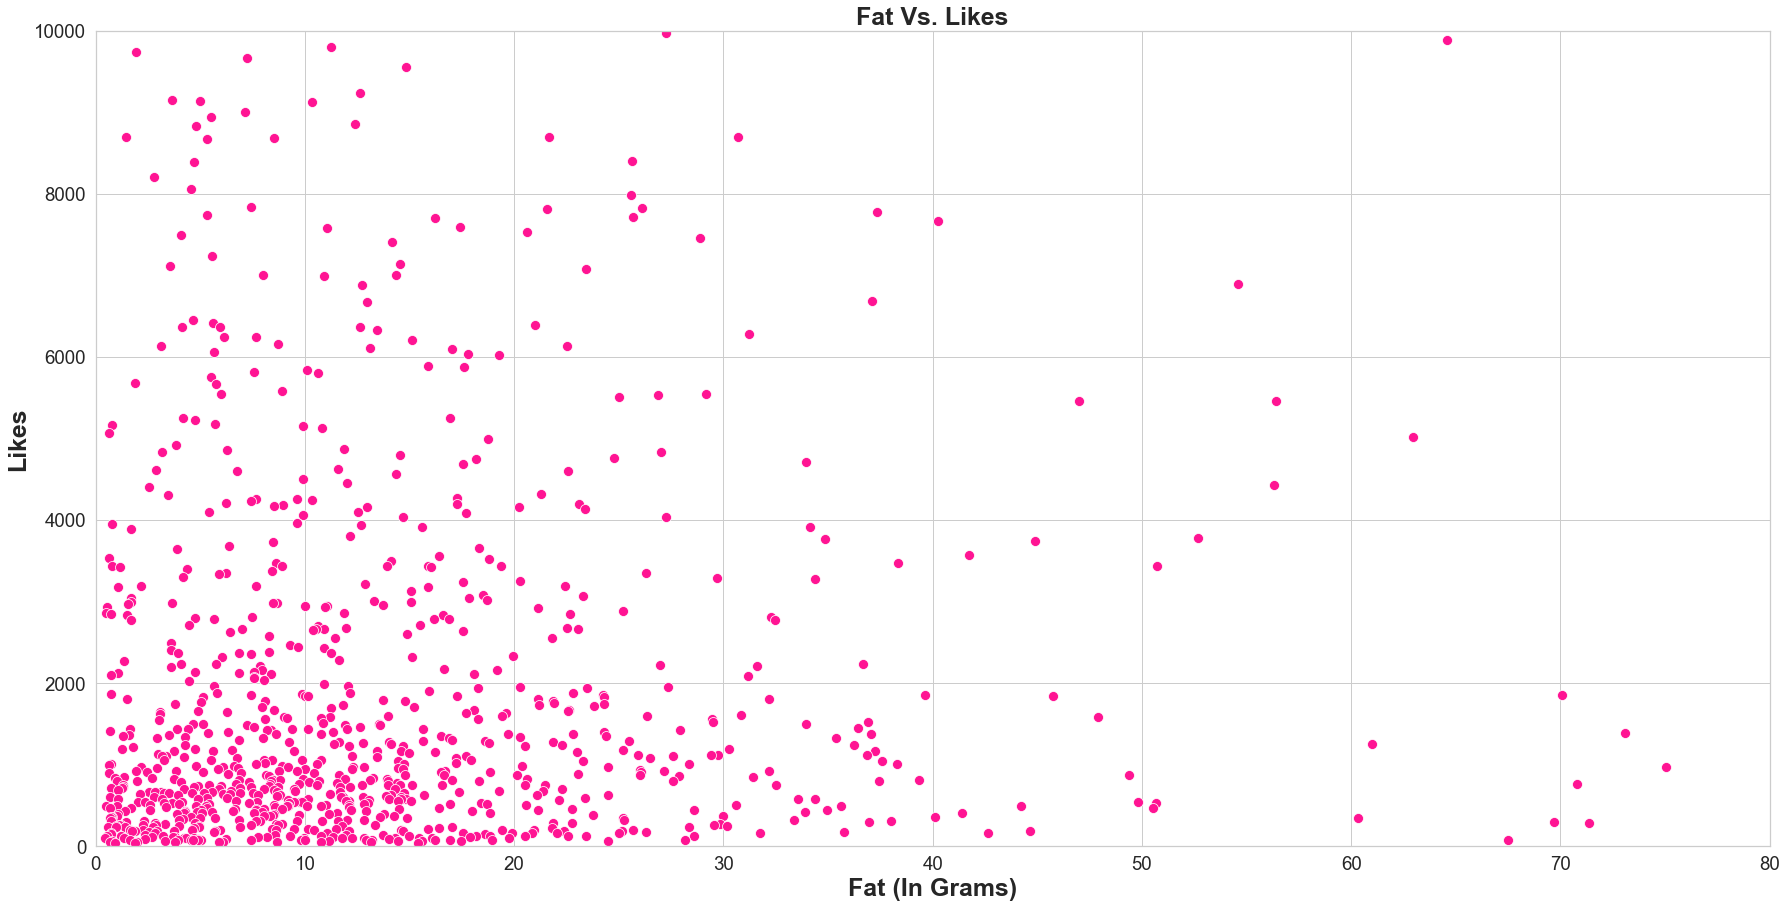

In [79]:
#scatterplot of "fat" vs "aggregatelikes" with y less than 10,000

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.scatterplot(x="fat", y="aggregatelikes", color='deeppink', s=100, data=df)
plt.xlabel('Fat (In Grams)', fontsize=25, weight = 'bold')
plt.ylabel('Likes', fontsize=25, weight = 'bold')
plt.title('Fat Vs. Likes', fontsize=25, weight = 'bold')

#the plot of Fat Vs. Likes looks very different when "Likes" (y-axis) is less than 10,000 per recipe
plt.axis([0,80,0,10000])
plt.show()

# plt.savefig('fat_versus_likes.pdf', dpi=300)